In [1]:
import numpy as np
from scipy.linalg import svd

# To find pgm files
import glob

# To read and show pgm files
from skimage.io import imread, imshow

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
%precision %.5f
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})

# Implementations

## Proximal operators

### Soft thresholding operator

In [2]:
def soft_thresholding(mat, epsilon):
    """
    Soft thresholding operator
    Proximal operator of the L1 norm
    :param mat: matrix to threshold
    :param epsilon: value of threshold
    :return mat: thresholded matrix
    """
    mat[np.abs(mat) < epsilon] = 0
    mat[mat > epsilon] -= epsilon
    mat[mat < -epsilon] += epsilon

    return mat

### Singular value thresholding

In [10]:
def svalue_thresholding(mat, epsilon):
    """
    Singular value thresholding
    Proximal operator of the nuclear norm
    :param mat: matrix of svalue to threshold
    :param epsilon: value of threshold
    :return mat: thresholded matrix
    """
    u, s, v = svd(mat, full_matrices = False, lapack_driver = 'gesvd')
    soft_thresholding(s, epsilon)
    return u.dot(np.diag(s).dot(v))

## Function A=lrmc(X,W,tau,beta)
### Parameters
+ X D × N data matrix.
+ W D × N binary matrix denoting known (1) or missing (0) entries.
+ $\tau$ Parameter of the optimization problem in (3.30).
+ $\beta$ Step size of the dual gradient ascent step in (3.32).

### Returned values
A Low-rank completion of the matrix X.
### Description
Finds a low-rank matrix A whose entries in W coincide with those of X by using the SVT algorithm.

In [9]:
def lrmc(X, W, tau, beta, tol = 10e-3, A_init = 0):
    """
    Finds a low-rank matrix A whose entries in W coincide
    with those of X by using the SVT algorithm.
    :param X: DxN data matrix
    :param W: DxN binary matrix denoting known (1) or missing (0) entries
    :param tau: Parameter of the optimization problem
    :param beta: Step size of the dual gradient ascent step
    :param tol: tolerance for convergence boost speed
    :return A: Low-rank completion of the mtrix X
    """
    A = A_init
    Z = beta * (X * W - A * W)
    stop = False
    while (stop == False):
        Z_prev = Z
        A = svalue_thresholding(Z * W, tau)
        Z = Z + beta * (X - A) * W
        if (np.linalg.norm(Z - Z_prev) / (tol + np.linalg.norm(Z_prev)) <= tol):
            stop = True
        print (np.linalg.norm(Z - Z_prev) / (tol + np.linalg.norm(Z_prev)))
    return A

# Data

In [5]:
IMG_DIR = "images/"
INDIVIDUALS = ["yaleB01", "yaleB02", "yaleB03"]

In [6]:
faces = {}
for k in INDIVIDUALS:
    faces[k] = {}
    faces[k]['files'] = glob.glob(IMG_DIR + k + "/" + k + "_P00A" + "*.pgm")
    faces[k]["data"] = np.concatenate([imread(f).reshape(-1, 1)\
                                       for f in faces[k]['files']], axis = 1)
    # Draw uniformly at random
    for i in np.arange(10) * 10 :
        faces[k][i] = np.random.choice([0,1],
                                       size = faces[k]["data"].shape,
                                       p = [i/100, 1 - i/100])

# Missing uniformly at random

In [98]:
D = faces['yaleB01']

In [99]:
D["data"].shape

(32256, 64)

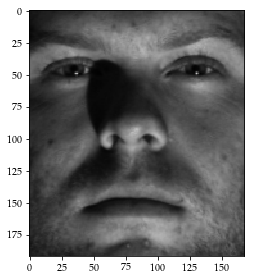

In [100]:
imshow(D["data"][:,0].reshape(192,168));

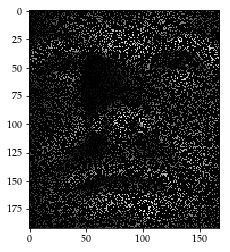

In [114]:
plt.imshow((D["data"][:,0] * D[80][:,0]).reshape(192,168), cmap = "gray");

# Complete faces

In [208]:
A_50 = lrmc(D["data"], D[50], tau = 50000, beta = 2)

KeyboardInterrupt: 

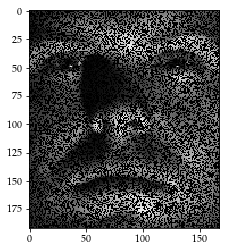

In [136]:
plt.imshow((D["data"][:,0] * D[50][:,0]).reshape(192,168), cmap = "gray");

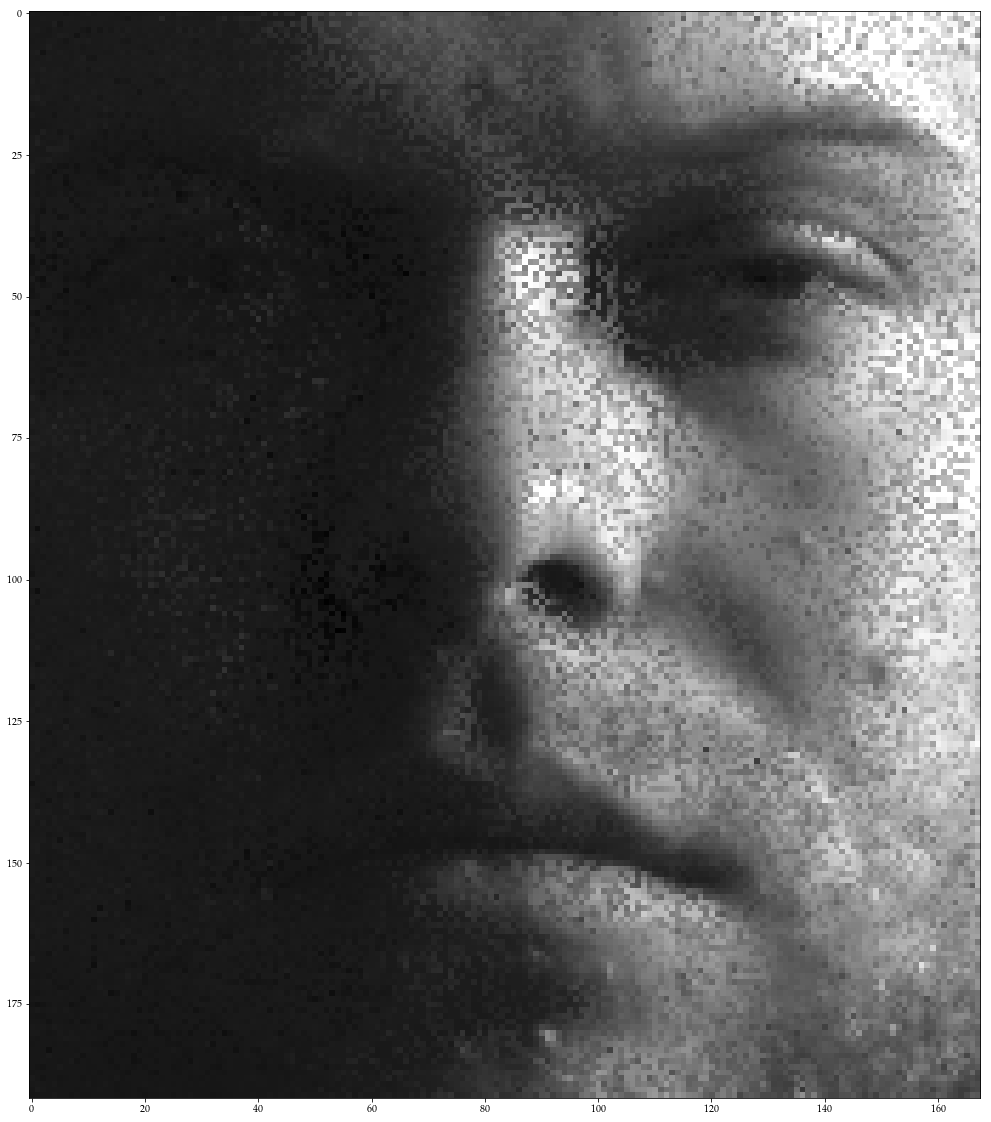

In [142]:
plt.figure(figsize = (20, 20))
plt.imshow(A_50[:,10].reshape(192,168), cmap = "gray");

In [140]:
((D["data"][:, 0] - A_50[:, 0])**2).mean()

77.92141

In [143]:
A_90 = lrmc(D["data"], D[90], tau = 400000, beta = 2)

1.0
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
89148.3199169
78956.8792346
66489.9145088
58958.8718498
54419.6320611
51593.169936
49727.0044219
48406.0063678
47406.9286986
46609.3690444
45946.8313065
45381.0881911
44888.9672225
44455.530754
44070.5138069
43726.4272986
42711.796216
38298.180938
35805.623377
34266.9266062
33206.1162748
32400.7347276
31745.1221537
31186.3149791
30695.7451281
30256.7132181
29858.6633739
29494.4410531
29158.9058366
28848.1875427
28559.2631609
28289.7022254
28037.5053428
27800.9969346
27578.7511021
27369.5386568
27172.2882268
26986.0570578
26810.0086848
26643.3955941
26485.5455789
26335.8508712
25797.4128826
24626.659541
23925.7557176
23375.6810244
22010.8758605
21183.8698984
20610.881265
20171.8480746
19812.6932714
19506.1512694
19236.7467254
18994.8263952
18773.9673466
18569.7131479
18378.8834213
18199.160

205.46732619
204.694361243
200.769864705
197.029963265
194.034293036
191.572197604
189.495008145
187.697874631
186.106732658
184.66914153
183.347798517
182.116026672
180.954604153
179.849566255
178.790661278
177.770278169
176.782690299
175.823527246
174.889400248
173.977637994
173.086098306
172.213033199
171.356992456
170.516752797
169.691267447
168.879627594
168.081035381
167.294781926
166.520232491
165.756813199
165.004002686
164.261323504
163.528337341
162.804639035
162.089853825
161.383632874
160.685651736
159.995606781
159.313214437
158.638208173
157.970338258
157.309369108
156.655079411
156.007259721
155.365712853
154.730251646
154.100699568
153.476888612
152.85866004
152.245862423
151.638352441
151.035993113
150.438654534
149.846212425
149.258548586
148.675550053
148.097108844
147.523122332
146.953491405
146.388123403
145.826926759
142.728918864
139.227998874
136.469796001
134.244948662
132.404155639
130.841521534
129.482091695
128.272813982
127.176038477
126.164948413
125.22032

11.2933284719
11.2564813052
11.21978529
11.1832397146
11.146843795
11.1105968285
11.0744980402
11.0385467354
11.0027421482
10.9670835923
10.9315703106
10.8962016248
10.8609767868
10.8258951262
10.7909559035
10.7561584562
10.7215020534
10.6869860403
10.6526096943
10.6183723683
10.584273348
10.5503119941
10.5164876003
10.4827995347
10.4492470992
10.4158296691
10.3825465542
10.3493971372
10.3163807357
10.2834967397
10.2507444745
10.2181233371
10.1856326603
10.1532718482
10.1210402413
10.0889372503
10.0569622232
10.0251145776
9.99339366881
9.961798921
9.93032969673
9.89898542683
9.86776548109
9.8366692968
9.80569625072
9.7748457866
9.74411728813
9.71351020552
9.68302392922
9.65265791563
9.62241156218
9.59228433137
9.56227562723
9.53238491833
9.50261161535
9.47295519301
9.4434150684
9.41399072204
9.38468157763
9.35548712154
9.32640678368
9.29744005631
9.26858637556
9.23984523939
9.21121609017
9.18269843137
9.1542917116
9.12599543992
9.0978090708
9.06973211873
9.04176404436
9.0139043675
8.98

2.3756329791
2.37062266745
2.36562682323
2.36064539634
2.35567834485
2.35072561894
2.3457871768
2.34086296948
2.33595295538
2.33105708551
2.32617531862
2.32130760598
2.31645390704
2.31161417388
2.30678836578
2.30197643498
2.29717834113
2.29239403684
2.287623482
2.2828666298
2.27812344059
2.27339386749
2.26867787129
2.26397540548
2.25928643116
2.25461090216
2.24994877964
2.24530001806
2.24066457904
2.23604241728
2.2314334944
2.2268377656
2.22225519317
2.217685732
2.21312934443
2.20858598654
2.20405562086
2.19953820323
2.1950336967
2.1905420577
2.18606324941
2.18159722825
2.17714395785
2.17270339533
2.16827550443
2.16386024234
2.15945757309
2.15506745428
2.1506898501
2.14632471847
2.14197202411
2.13763172529
2.13330378653
2.12898816636
2.1246848301
2.12039373633
2.11611485044
2.1118481319
2.10759354618
2.10335105239
2.09912061656
2.09490219873
2.09069576468
2.08650127438
2.08231869446
2.07814798488
2.07398911204
2.06984203671
2.06570672599
2.06158314073
2.05747124797
2.05337100877
2.0492

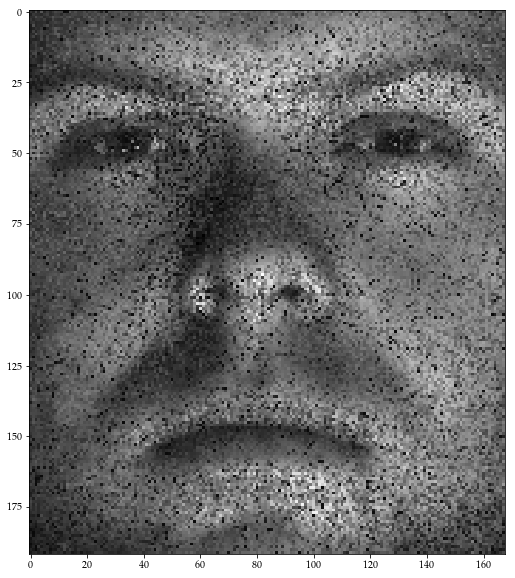

In [147]:
plt.figure(figsize = (10, 10))
plt.imshow(A_90[:,0].reshape(192,168), cmap = "gray");

In [144]:
((D["data"][:, 0] - A_90[:, 0])**2).mean()

903.35013

In [151]:
A_30 = lrmc(D["data"], D[30], tau = 400000, beta = 1.43)

100.0
168430.587719
168430.587719
168430.587719
168430.587719
85592.4740575
80564.7173715
80201.8914941
79988.7700096
60100.1883022
50241.5604682
49950.4218748
49752.833756
49611.6114562
49508.6857181
49432.3861165
49374.9953261
49099.3653373
40044.2195531
32522.6526615
30046.4302968
29890.6685002
29765.2123313
29660.2293679
29571.1295816
29494.6939785
29428.5726105
29370.9966967
29320.598027
29276.2932337
29237.2075789
29202.6233189
29171.9437078
28423.4555585
25573.556862
25515.2806868
25471.0146494
25431.9560674
25397.0970191
23942.0219347
22473.8361728
22422.1842428
22380.3808056
22342.5874169
22308.1210002
22276.5126447
22247.3986906
22220.488606
22195.5438413
22172.3639098
21349.0000439
20260.5007701
20220.3917262
20190.831697
20163.8686247
20138.9234536
20115.6793076
20093.9060632
20073.4281113
20054.1017406
20035.7929819
18895.337584
18679.9166302
18654.7840232
18631.8703431
18610.3498313
18589.974044
18570.5542882
18551.9055256
18533.7628273
17634.8182101
17500.9798664
17479.7

1113.36405206
1112.5313234
1111.71156748
1110.90294405
1110.10412169
1109.31410091
1108.53210456
1107.75750888
1106.98979927
1106.22854133
1105.47336144
1104.72393332
1103.9799685
1103.24120938
1102.50742392
1101.77840159
1101.05395012
1100.33389281
1099.61806636
1098.90631895
1098.19850862
1097.49450181
1096.79417205
1096.09739877
1095.4040661
1094.71406182
1094.02727616
1093.34360063
1092.66292677
1091.98514463
1091.31014105
1090.63779755
1089.9679876
1089.30057301
1088.63539893
1087.97228681
1087.31102371
1086.65134574
1085.99291063
1085.33524929
1084.67767234
1084.01906716
1083.35737453
1082.68780097
998.512167429
973.598786486
972.001826164
970.944745734
970.029871413
969.194182457
968.40938038
967.659201292
966.933742409
966.226736647
965.53412371
964.853189616
964.182063331
963.519408829
962.864238296
962.21579587
961.573484716
960.936820229
960.305399439
959.678880506
959.05696861
958.43940597
957.825964577
957.216440745
956.610650929
956.008428414
955.409620642
954.81408701
95

In [154]:
((D["data"][:, 30] - A_30[:, 30])**2).mean()

49.06276

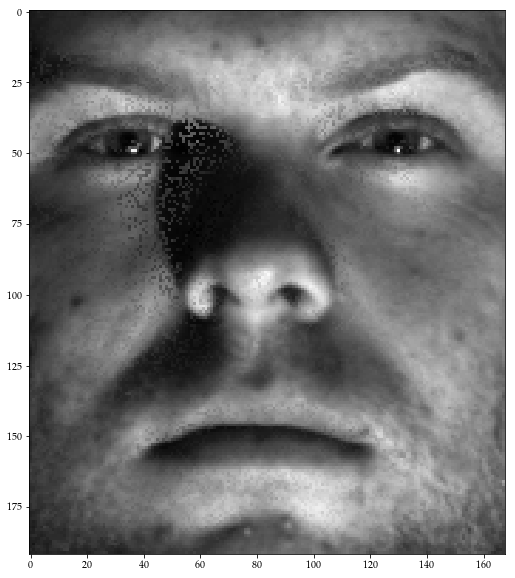

In [155]:
plt.figure(figsize = (10, 10))
plt.imshow(A_30[:,0].reshape(192,168), cmap = "gray");

In [156]:
A_30_1 = lrmc(D["data"], D[30], tau = 400000, beta = 1.43, tol = 1)

1.0
168430.587719
168430.587719
168430.587719
168430.587719
85592.4740575
80564.7173715
80201.8914941
79988.7700096
60100.1883022
50241.5604682
49950.4218748
49752.833756
49611.6114562
49508.6857181
49432.3861165
49374.9953261
49099.3653373
40044.2195531
32522.6526615
30046.4302968
29890.6685002
29765.2123313
29660.2293679
29571.1295816
29494.6939785
29428.5726105
29370.9966967
29320.598027
29276.2932337
29237.2075789
29202.6233189
29171.9437078
28423.4555585
25573.556862
25515.2806868
25471.0146494
25431.9560674
25397.0970191
23942.0219347
22473.8361728
22422.1842428
22380.3808056
22342.5874169
22308.1210002
22276.5126447
22247.3986906
22220.488606
22195.5438413
22172.3639098
21349.0000439
20260.5007701
20220.3917262
20190.831697
20163.8686247
20138.9234536
20115.6793076
20093.9060632
20073.4281113
20054.1017406
20035.7929819
18895.337584
18679.9166302
18654.7840232
18631.8703431
18610.3498313
18589.974044
18570.5542882
18551.9055256
18533.7628273
17634.8182101
17500.9798664
17479.781

1113.36405206
1112.5313234
1111.71156748
1110.90294405
1110.10412169
1109.31410091
1108.53210456
1107.75750888
1106.98979927
1106.22854133
1105.47336144
1104.72393332
1103.9799685
1103.24120938
1102.50742392
1101.77840159
1101.05395012
1100.33389281
1099.61806636
1098.90631895
1098.19850862
1097.49450181
1096.79417205
1096.09739877
1095.4040661
1094.71406182
1094.02727616
1093.34360063
1092.66292677
1091.98514463
1091.31014105
1090.63779755
1089.9679876
1089.30057301
1088.63539893
1087.97228681
1087.31102371
1086.65134574
1085.99291063
1085.33524929
1084.67767234
1084.01906716
1083.35737453
1082.68780097
998.512167429
973.598786486
972.001826164
970.944745734
970.029871413
969.194182457
968.40938038
967.659201292
966.933742409
966.226736647
965.53412371
964.853189616
964.182063331
963.519408829
962.864238296
962.21579587
961.573484716
960.936820229
960.305399439
959.678880506
959.05696861
958.43940597
957.825964577
957.216440745
956.610650929
956.008428414
955.409620642
954.81408701
95

48.4355293108
48.2881884395
48.1414512511
47.9953144635
47.8497748173
47.7048290756
47.5604740239
47.41670647
47.2735232434
47.1309211956
46.9888971995
46.8474481495
46.7065709613
46.5662625716
46.4265199379
46.2873400384
46.148719872
46.0106564578
45.8731468351
45.7361880631
45.5997772211
45.4639114078
45.3285877416
45.1938033602
45.0595554205
44.9258410985
44.7926575888
44.6600021051
44.5278718794
44.3962641622
44.2651762223
44.1346053466
44.0045488399
43.8750040249
43.745968242
43.617438849
43.4894132212
43.3618887512
43.2348628485
43.1083329398
42.9822964685
42.8567508949
42.7316936955
42.6071223636
42.4830344087
42.3594273563
42.2362987482
42.113646142
41.9914671111
41.8697592445
41.7485201469
41.6277474383
41.5074387541
41.3875917447
41.2682040758
41.1492734279
41.0307974964
40.9127739913
40.7952006372
40.6780751734
40.5613953534
40.4451589449
40.3293637299
40.2140075043
40.099088078
39.9846032749
39.8705509322
39.7569289012
39.6437350463
39.5309672454
39.41862339
39.3067013845
3

11.3427223843
11.3191263009
11.2955886083
11.2721091318
11.2486876971
11.2253241306
11.2020182594
11.1787699111
11.1555789142
11.1324450975
11.1093682906
11.0863483238
11.0633850277
11.0404782338
11.0176277743
10.9948334816
10.972095189
10.9494127304
10.9267859403
10.9042146537
10.8816987062
10.859237934
10.8368321741
10.8144812638
10.7921850411
10.7699433445
10.7477560134
10.7256228873
10.7035438067
10.6815186123
10.6595471458
10.637629249
10.6157647646
10.5939535357
10.5721954061
10.55049022
10.5288378222
10.5072380582
10.4856907738
10.4641958156
10.4427530306
10.4213622663
10.4000233708
10.3787361928
10.3575005815
10.3363163866
10.3151834584
10.2941016476
10.2730708056
10.2520907841
10.2311614355
10.2102826128
10.1894541693
10.1686759589
10.147947836
10.1272696557
10.1066412732
10.0860625447
10.0655333265
10.0450534756
10.0246228495
10.0042413061
9.98390870391
9.96362490189
9.94338975947
9.92320313659
9.90306489368
9.88297489164
9.86293299189
9.84293905629
9.8229929472
9.80309452747

3.69750178937
3.69106003828
3.68463100107
3.67821464898
3.67181095332
3.66541988549
3.65904141694
3.65267551921
3.64632216393
3.63998132277
3.6336529675
3.62733706995
3.62103360202
3.6147425357
3.60846384304
3.60219749617
3.59594346728
3.58970172864
3.5834722526
3.57725501157
3.57104997803
3.56485712453
3.55867642371
3.55250784827
3.54635137097
3.54020696464
3.53407460221
3.52795425664
3.52184590099
3.51574950838
3.50966505199
3.50359250508
3.49753184098
3.49148303307
3.48544605483
3.47942087978
3.47340748152
3.46740583373
3.46141591013
3.45543768453
3.44947113079
3.44351622287
3.43757293475
3.43164124051
3.42572111428
3.41981253028
3.41391546277
3.40802988608
3.40215577462
3.39629310285
3.39044184531
3.38460197659
3.37877347136
3.37295630433
3.36715045032
3.36135588416
3.35557258078
3.34980051517
3.34403966237
3.33828999749
3.33255149571
3.32682413227
3.32110788247
3.31540272168
3.30970862531
3.30402556887
3.2983535279
3.29269247801
3.28704239489
3.28140325427
3.27577503195
3.27015770

1.40259984258
1.4004173054
1.39823850797
1.39606344316
1.39389210382
1.39172448283
1.38956057309
1.3874003675
1.38524385898
1.38309104048
1.38094190496
1.37879644537
1.37665465472
1.37451652599
1.3723820522
1.37025122638
1.36812404157
1.36600049084
1.36388056726
1.36176426392
1.35965157392
1.35754249039
1.35543700645
1.35333511525
1.35123680996
1.34914208376
1.34705092983
1.34496334138
1.34287931164
1.34079883383
1.33872190122
1.33664850706
1.33457864464
1.33251230724
1.33044948818
1.32839018077
1.32633437835
1.32428207428
1.32223326191
1.32018793463
1.31814608582
1.3161077089
1.31407279729
1.31204134441
1.31001334372
1.30798878869
1.30596767278
1.30394998948
1.30193573231
1.29992489478
1.29791747042
1.29591345278
1.29391283542
1.2919156119
1.28992177582
1.28793132077
1.28594424038
1.28396052826
1.28198017805
1.28000318342
1.27802953803
1.27605923556
1.2740922697
1.27212863416
1.27016832267
1.26821132895
1.26625764676
1.26430726985
1.26236019201
1.26041640701
1.25847590866
1.2565386907

In [158]:
((D["data"][:, 30] - A_30_1[:, 30])**2).mean()

49.08616

In [166]:
((D["data"] - A_30_1)**2).mean(axis = 0)

array([  22.10228202,   11.48434634,   49.62098576,    9.273332  ,
        137.75907633,   31.59598059,   17.56345945,   82.65610847,
         24.7064719 ,   51.33704091,   57.5328889 ,   97.29516102,
        111.57041753,    8.34521692,    4.32377631,  104.28244134,
         48.48947637,   51.19257699,   55.69192764,    9.06442954,
          9.08521861,   51.52158365,   62.59994945,   13.90511786,
         21.6433308 ,    8.14287096,   27.11010977,   16.01085183,
         41.24975416,   28.34283148,   49.08615617,    4.6210141 ,
          4.24396332,   96.4661275 ,   14.31837027,   80.01442836,
        152.28007587,   98.02734839,   21.64646248,   54.48244837,
         35.2420721 ,   67.07932134,   18.11269115,    6.62060442,
          6.81842327,   14.93942474,   24.90459128,   20.14424104,
        128.25741534,   72.36059257,   34.80428394,   20.30016125,
         21.46323601,    9.22504   ,   57.57346819,  195.4380925 ,
        126.95221848,    9.49001864,    6.51317387,  123.24175

### For the first individual

In [7]:
# D = faces['yaleB01']
# MSE = {}
# RES = {}
n_cols = 64
# tau_range = [200000, 400000, 600000]
tau_range = [50000, 100000, 200000, 400000, 600000]
# tau_range = [1000, 10000, 50000, 100000, 2000000, 300000, 400000, 500000, 600000, 700000, 1000000]

In [240]:
start_time = time.time()
for M in np.arange(1, 10) * 10.:
    print ("--------------- % of missing entries : {} ---------------".format(M/100))
    MSE[M] = {}
    RES[M] = {}
    for t in range(len(tau_range)):
        print ("Power for entrepreneurs : {}".format(tau_range[t]))
        RES[M][tau_range[t]] = lrmc(D["data"][:, :n_cols], D[M][:, :n_cols],
                         tau = tau_range[t],
                         beta = min(2, 1/(1-M/100.)),
                         tol = 10e-4,
                         A_init = RES[M][tau_range[t - 1]] if t > 0 else 0)
        MSE[M][tau_range[t]] = ((D["data"][:, :n_cols] - RES[M][tau_range[t]]) ** 2).mean(axis = 0)
        
end_time = time.time()
print("total time taken this loop: ", end_time - start_time)

--------------- % of missing entries : 0.3 ---------------
Power for entrepreneurs : 50000
1.0
168259.440982
96472.6937005
49486.7079685
31337.3181503
28713.5938823
24046.7966572
21988.2981129
20632.974841
19078.3342899
17898.684062
17302.4894337
15729.5268176
14710.3416604
13485.8574101
12736.6556719
11794.3791226
10950.2028087
10173.4903676
9574.48655076
8509.49627522
8023.16906615
7368.33653855
7058.23134336
6551.47705215
6203.15358969
5942.92637883
5700.2036295
5438.09964868
5218.80841502
4886.5690656
4649.63784835
4584.63960136
4416.32542399
4037.76318499
3847.58937922
3548.80162015
3501.20789357
3307.11175141
3105.29556996
3054.57157001
2873.68016015
2751.29325234
2672.19261532
2538.01865266
2486.61254497
2431.42255008
2160.69130182
1969.29200252
1941.27475358
1754.33233091
1727.99646494
1709.82900908
1693.59257388
1678.45579908
1570.59624257
1519.12785837
1503.60782538
1490.6166175
1478.55370686
1454.86535719
1322.56295535
1306.92821097
1295.62303584
1285.33187672
1178.68146754


82.3077323923
81.0854011364
79.8882002777
78.7154200668
77.5663783181
76.4404188959
75.3369103196
74.255244475
73.1948354203
72.1551182782
71.135548204
70.1355994241
69.1547643383
68.192552679
67.2484907238
66.3221205563
65.4129993716
64.5206988221
63.6448044015
62.7849148635
61.9406416724
61.1116084843
60.2974506551
59.497814775
58.7123582269
57.9407487671
57.1826641269
56.4377916341
55.7058278525
54.9864782385
54.2794568147
53.5844858575
52.9012956001
52.2296239479
51.5692162074
50.9198248267
50.2812091474
49.653135167
49.0353753117
48.4277082188
47.8299185275
47.2417966794
46.663138726
46.093746145
45.5334256631
44.9819890864
44.4392531372
43.9050392972
43.3791736567
42.8614867697
42.3518135142
41.8499929582
41.3558682302
40.869286395
40.3900983335
39.9181586272
39.4533254472
38.9954604464
38.544428656
38.1000983858
37.662341128
37.2310314636
36.8060469732
36.3872681499
35.9745783159
35.5678635413
35.1670125663
34.7719167252
34.382469874
33.9985683191
33.6201107498
33.2469981717
32.

8152.94489366
8071.89793602
8044.57769627
7804.18394522
7600.2162239
7470.96044204
7436.78549738
7181.07842122
7157.31259799
7136.31267489
7115.93636918
7030.82181304
6833.7530028
6813.44367219
6795.44553078
6625.74743023
6538.57223949
6518.14913025
6260.35135437
6230.83742666
6214.71984119
6015.40735346
5982.40433256
5966.74276749
5858.53939781
5733.96174844
5717.84323022
5703.49750229
5689.75031322
5676.13051506
5526.69341379
5458.2297788
5444.48570892
5431.6940759
5419.09528537
5360.69987638
5193.16678618
5178.92214441
5166.7318656
5155.06859554
5143.56268491
4967.28575018
4941.82571749
4930.18803356
4918.80889571
4764.86135232
4591.97964314
4517.39261753
4506.05077818
4496.19072667
4486.99902461
4348.21873729
4281.19324403
4271.07190675
4262.14645127
4253.71593716
4245.59738745
4237.69882293
4229.95572885
4222.31198602
4214.69764274
4051.94010447
4017.87505423
4008.80650213
4000.1631824
3991.3709442
3810.53076791
3798.9616855
3790.10605006
3645.57798227
3440.35750047
3418.89809032


KeyboardInterrupt: 

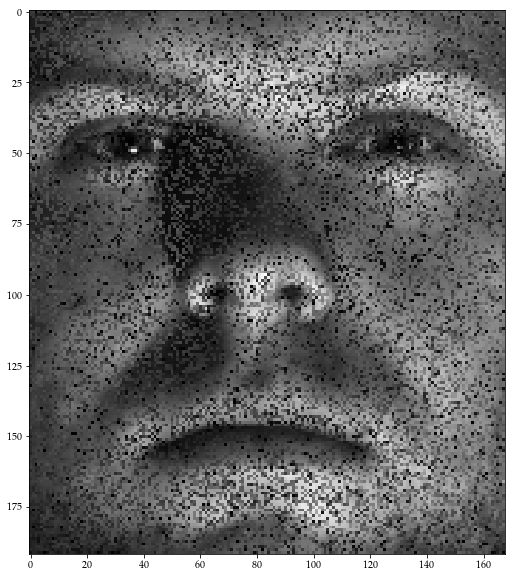

In [218]:
plt.figure(figsize = (10, 10))
plt.imshow(RES[50][100000][:,0].reshape(192,168), cmap = "gray");

In [232]:
M = 50
test = lrmc(D["data"][:, :n_cols], D[M][:, :n_cols], tau = 100000, beta = min(2, 1/(1-M/100)), tol = 1, A = RES[M][100000])

1082.48741743
65515.61536
65515.61536
65515.61536
39577.2454689
34718.6967533
24585.1607132
21815.505789
20452.4569366
17758.5825466
15597.2881091
14777.8385429
13779.0142148
11909.6029225
10508.3841163
8877.19727231
7145.11876608
5864.05886828
5493.03622391
4601.46491951
4248.77212876
4028.53300726
3853.00883192
3185.63973954
2426.21575674
2198.75357979
2051.0906028
1940.48909403
1855.35992205
1789.67674177
1738.43250899
1698.44848692
1666.90361212
1641.99444064
1622.0878387
1606.14655353
1593.21428117
1582.68951657
1574.00559439
1566.80990803
1560.76168542
1555.65129768
1551.270301
1547.49201306
1544.18659364
1541.27612894
1538.67823673
1536.34412954
1534.22058544
1532.27650853
1530.47691793
1528.80165144
1527.22734191
1525.74070132
1524.32588347
1522.97399468
1521.67413818
1520.42027417
1519.20481238
1518.02359419
1516.87126929
1515.74493639
1514.64078228
1513.55675686
1512.49011435
1511.43938777
1510.40258075
1509.37863023
1508.36607131
1507.36412359
1506.37170265
1505.3882278
1504

1237.24363793
1236.94035019
1236.63754015
1236.33520918
1236.0333542
1235.73197658
1235.43107324
1235.13064556
1234.83069047
1234.53120934
1234.23219913
1233.93366119
1233.63559249
1233.33799439
1233.04086386
1232.74420227
1232.4480066
1232.15227821
1231.85701409
1231.5622156
1231.26787975
1230.97400789
1230.68059703
1230.38764854
1230.09515944
1229.80313108
1229.51156049
1229.22044903
1228.92979375
1228.63959599
1228.34985281
1228.06056555
1227.7717313
1227.48335138
1227.19542288
1226.90794713
1226.62092124
1226.33434653
1226.04822012
1225.76254332
1225.47731327
1225.19253128
1224.90819448
1224.6243042
1224.34085758
1224.05785593
1223.77529642
1223.49318035
1223.21150488
1222.93027134
1222.64947689
1222.36912284
1222.08920638
1221.8097288
1221.53068733
1221.25208324
1220.97391375
1220.69618015
1220.41887967
1220.14201359
1219.86557915
1219.58957764
1219.3140063
1219.0388664
1218.76415522
1218.48987402
1218.21602008
1217.94259466
1217.66959504
1217.3970225
1217.12487432
1216.85315176
1

1119.32884415
1119.20784561
1119.08703318
1118.96640583
1118.84596401
1118.72570671
1118.60563438
1118.48574599
1118.36604201
1118.24652141
1118.12718465
1118.00803072
1117.88906007
1117.77027168
1117.65166601
1117.53324204
1117.41500024
1117.29693959
1117.17906054
1117.06136209
1116.94384468
1116.82650733
1116.70935046
1116.5923731
1116.47557567
1116.35895719
1116.2425181
1116.12625742
1116.01017557
1115.89427159
1115.77854589
1115.66299752
1115.54762689
1115.43243303
1115.31741638
1115.20257596
1115.0879122
1114.97342414
1114.8591122
1114.74497542
1114.63101422
1114.51722764
1114.40361611
1114.29017867
1114.17691575
1114.06382638
1113.95091098
1113.83816862
1113.7255997
1113.61320328
1113.50097978
1113.38892824
1113.2770491
1113.16534139
1113.05380555
1112.94244064
1112.83124705
1112.72022387
1112.6093715
1112.49868901
1112.38817681
1112.27783396
1112.16766089
1112.05765666
1111.94782168
1111.83815502
1111.7286571
1111.61932699
1111.5101651
1111.40117051
1111.29234362
1111.18368352
1

1072.17591053
1072.12741796
1072.07900024
1072.030657
1071.98238839
1071.93419403
1071.88607407
1071.83802813
1071.79005636
1071.74215839
1071.69433436
1071.6465839
1071.59890715
1071.55130375
1071.50377384
1071.45631704
1071.4089335
1071.36162286
1071.31438526
1071.26722032
1071.2201282
1071.17310852
1071.12616143
1071.07928657
1071.03248407
1070.98575357
1070.93909522
1070.89250864
1070.84599399
1070.7995509
1070.7531795
1070.70687945
1070.66065088
1070.61449343
1070.56840723
1070.52239194
1070.47644769
1070.43057413
1070.38477139
1070.33903911
1070.29337744
1070.24778602
1070.20226499
1070.15681399
1070.11143316
1070.06612216
1070.0208811
1069.97570966
1069.93060795
1069.88557563
1069.84061284
1069.79571923
1069.75089493
1069.7061396
1069.66145336
1069.61683588
1069.57228728
1069.52780723
1069.48339584
1069.4390528
1069.39477821
1069.35057174
1069.30643353
1069.26236323
1069.21836097
1069.17442642
1069.13055969
1069.08676047
1069.04302886
1068.99936455
1068.95576765
1068.91223783
10

1053.22165486
1053.20237095
1053.18311675
1053.16389214
1053.14469715
1053.12553165
1053.10639568
1053.08728911
1053.06821198
1053.04916416
1053.03014569
1053.01115643
1052.99219644
1052.97326557
1052.95436387
1052.9354912
1052.91664762
1052.89783298
1052.87904733
1052.86029053
1052.84156264
1052.82286351
1052.80419319
1052.78555155
1052.76693863
1052.7483543
1052.72979861
1052.71127141
1052.69277275
1052.67430251
1052.65586072
1052.63744726
1052.61906217
1052.60070531
1052.58237673
1052.5640763
1052.54580406
1052.52755988
1052.50934381
1052.49115572
1052.47299564
1052.45486345
1052.43675919
1052.41868273
1052.40063412
1052.38261323
1052.36462009
1052.34665458
1052.32871675
1052.31080646
1052.29292376
1052.27506851
1052.25724077
1052.23944041
1052.22166746
1052.2039218
1052.18620347
1052.16851235
1052.15084847
1052.13321172
1052.11560212
1052.09801957
1052.08046409
1052.06293557
1052.04543404
1052.02795939
1052.01051164
1051.99309068
1051.97569655
1051.95832912
1051.94098844
1051.92367

1045.65660259
1045.64891542
1045.64123997
1045.63357618
1045.62592407
1045.61828358
1045.61065474
1045.60303749
1045.59543185
1045.58783777
1045.58025525
1045.57268425
1045.56512479
1045.55757682
1045.55004034
1045.54251531
1045.53500174
1045.52749959
1045.52000887
1045.51252952
1045.50506157
1045.49760495
1045.4901597
1045.48272575
1045.47530313
1045.46789177
1045.46049171
1045.45310288
1045.44572531
1045.43835893
1045.43100378
1045.42365979
1045.41632698
1045.40900531
1045.40169479
1045.39439536
1045.38710705
1045.3798298
1045.37256363
1045.36530849
1045.3580644
1045.3508313
1045.34360921
1045.33639809
1045.32919794
1045.32200871
1045.31483044
1045.30766305
1045.30050657
1045.29336096
1045.28622622
1045.2791023
1045.27198923
1045.26488694
1045.25779547
1045.25071476
1045.24364482
1045.2365856
1045.22953713
1045.22249935
1045.21547228
1045.20845587
1045.20145013
1045.19445501
1045.18747054
1045.18049667
1045.1735334
1045.16658069
1045.15963856
1045.15270696
1045.1457859
1045.13887533


1042.61725316
1042.6141484
1042.61104825
1042.60795269
1042.60486173
1042.60177535
1042.59869355
1042.59561631
1042.59254365
1042.58947553
1042.58641197
1042.58335294
1042.58029846
1042.5772485
1042.57420306
1042.57116214
1042.56812572
1042.5650938
1042.56206639
1042.55904345
1042.55602499
1042.553011
1042.55000149
1042.54699642
1042.54399582
1042.54099965
1042.53800793
1042.53502063
1042.53203776
1042.52905931
1042.52608527
1042.52311563
1042.52015039
1042.51718954
1042.51423307
1042.51128098
1042.50833327
1042.50538991
1042.50245091
1042.49951626
1042.49658596
1042.49365998
1042.49073835
1042.48782103
1042.48490803
1042.48199934
1042.47909496
1042.47619486
1042.47329907
1042.47040755
1042.46752031
1042.46463734
1042.46175864
1042.45888418
1042.45601399
1042.45314803
1042.45028632
1042.44742883
1042.44457557
1042.44172652
1042.43888169
1042.43604106
1042.43320463
1042.43037239
1042.42754434
1042.42472047
1042.42190077
1042.41908523
1042.41627386
1042.41346663
1042.41066356
1042.407864

KeyboardInterrupt: 

In [206]:
MSE

{30.00000: {50000: array([ 314.77529277,  328.68570634,  228.11388035,  232.28415314,
          251.97165194,  328.51471913,  301.19024013,  303.65062181,
          526.8378514 ,  598.11600231]),
  100000: array([ 251.62147562,  237.09923717,  210.25699684,  179.12459417,
          249.18365451,  255.61728865,  255.44525764,  280.77762876,
          424.75964313,  520.57912833]),
  200000: array([ 225.40220173,  203.06762858,  201.99409438,  157.99921749,
          247.8456526 ,  226.07127971,  235.62667173,  269.96985947,
          380.47028284,  484.25661543]),
  400000: array([ 213.59533581,  188.35585009,  198.05574067,  148.55516256,
          247.19909938,  212.84913081,  226.49391088,  264.76638693,
          360.11811639,  466.88850916]),
  600000: array([ 209.79888322,  183.72032749,  196.76009778,  145.52609907,
          246.98449897,  208.61475287,  223.53993571,  263.05890798,
          353.55748082,  461.20641955])},
 50.00000: {50000: array([ 1043.43872788,  1481.2756895

# Movie recommandation

In [159]:
import pandas as pd

In [161]:
df = pd.read_csv("ratings_medium_n4_Horror_Romance_42.csv")
df

,userId,genreId,movieId,rating,timestamp,movieInd,userInd
0,4,1,610,4.0,949982238,23,0
1,4,1,1200,5.0,949896244,41,0
2,4,1,1214,5.0,949810261,42,0
3,4,1,1219,5.0,949779173,44,0
4,4,1,1258,5.0,949918743,47,0
5,4,1,1332,4.0,949896275,60,0
6,4,1,1334,5.0,949982274,62,0
7,4,1,1387,5.0,949810261,76,0
8,4,1,1388,4.0,949810302,77,0
9,4,1,1994,5.0,949896309,121,0


In [162]:
df.rating

0        4.0
1        5.0
2        5.0
3        5.0
4        5.0
5        4.0
6        5.0
7        5.0
8        4.0
9        5.0
10       2.0
11       5.0
12       4.0
13       4.0
14       3.0
15       2.0
16       1.0
17       3.0
18       5.0
19       5.0
20       3.0
21       4.0
22       5.0
23       5.0
24       5.0
25       5.0
26       5.0
27       4.0
28       4.0
29       5.0
        ... 
13442    3.0
13443    4.0
13444    4.0
13445    5.0
13446    3.0
13447    5.0
13448    3.0
13449    3.0
13450    4.0
13451    3.0
13452    3.0
13453    3.0
13454    3.0
13455    3.0
13456    1.0
13457    3.0
13458    2.0
13459    3.0
13460    3.0
13461    4.0
13462    5.0
13463    3.0
13464    4.0
13465    4.0
13466    3.0
13467    4.0
13468    3.0
13469    5.0
13470    4.0
13471    3.0
Name: rating, Length: 13472, dtype: float64

In [163]:
df.userId.unique

<bound method Series.unique of 0          4
1          4
2          4
3          4
4          4
5          4
6          4
7          4
8          4
9          4
10         4
11         4
12         4
13         4
14         4
15         4
16         4
17         4
18         4
19         4
20         4
21         4
22         4
23         4
24         4
25         4
26         4
27         4
28         4
29         4
        ... 
13442    665
13443    665
13444    665
13445    665
13446    665
13447    665
13448    665
13449    665
13450    665
13451    665
13452    665
13453    665
13454    665
13455    665
13456    665
13457    665
13458    665
13459    665
13460    665
13461    665
13462    665
13463    665
13464    665
13465    665
13466    665
13467    665
13468    665
13469    665
13470    665
13471    665
Name: userId, Length: 13472, dtype: int64>